In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

url = "https://raw.githubusercontent.com/camilousa/datasets/refs/heads/master/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(url)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

num_feats = ["age","hypertension","heart_disease","avg_glucose_level","bmi"]
cat_feats = ["gender","ever_married","work_type","Residence_type","smoking_status"]

preprocessor = ColumnTransformer([
    ("num", Pipeline([("impute", SimpleImputer(strategy="median")),
                      ("scale", StandardScaler())]), num_feats),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_feats),
])

pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=500))
])

pipeline.fit(train_x, train_y)
preds = pipeline.predict(test_x)
print(classification_report(test_y, preds))


              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1444
           1       0.15      0.73      0.25        89

    accuracy                           0.75      1533
   macro avg       0.57      0.74      0.55      1533
weighted avg       0.93      0.75      0.81      1533



🔹 Confusion Matrix:
 [[1081  363]
 [  24   65]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85      1444
           1       0.15      0.73      0.25        89

    accuracy                           0.75      1533
   macro avg       0.57      0.74      0.55      1533
weighted avg       0.93      0.75      0.81      1533

🔹 ROC‑AUC: 0.841


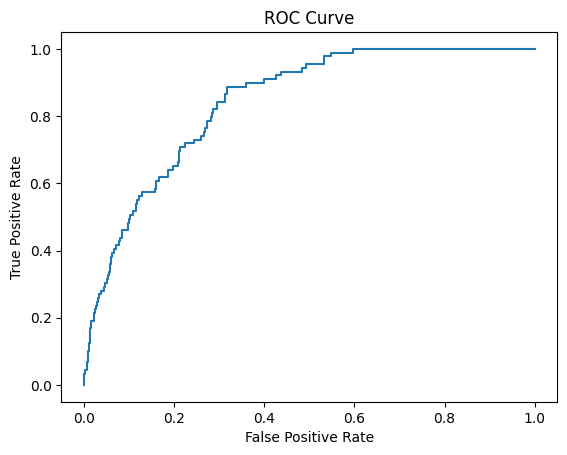

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# 5️⃣ Pipeline + modelo
num_feats = ["age","hypertension","heart_disease","avg_glucose_level","bmi"]
cat_feats = ["gender","ever_married","work_type","Residence_type","smoking_status"]

preprocessor = ColumnTransformer([
    ("num", Pipeline([("impute", SimpleImputer(strategy="median")),
                      ("scale", StandardScaler())]), num_feats),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_feats),
])

pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=500))
])

pipeline.fit(train_x, train_y)

# 6️⃣ Predicción y evaluación
preds = pipeline.predict(test_x)
probs = pipeline.predict_proba(test_x)[:,1]

print("🔹 Confusion Matrix:\n", confusion_matrix(test_y, preds))
print("\n🔹 Classification Report:\n", classification_report(test_y, preds))
print(f"🔹 ROC‑AUC: {roc_auc_score(test_y, probs):.3f}")

# Opcional: Curva ROC
fpr, tpr, _ = roc_curve(test_y, probs)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


Confusion Matrix:
 [[885 331]
 [ 12  50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.73      0.84      1216
           1       0.13      0.81      0.23        62

    accuracy                           0.73      1278
   macro avg       0.56      0.77      0.53      1278
weighted avg       0.95      0.73      0.81      1278

ROC‑AUC: 0.836


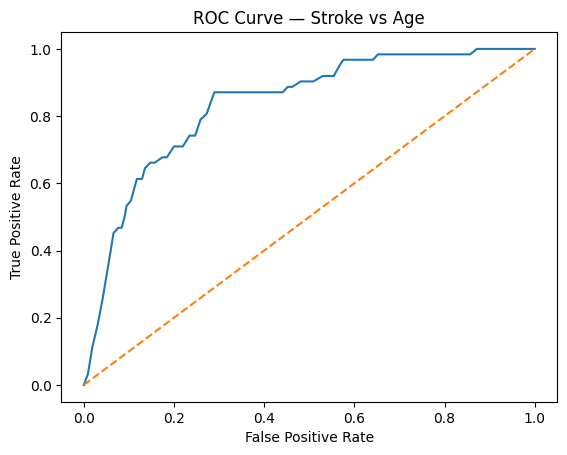

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1️⃣ Definir X e y
X = df[["age"]]
y = df["stroke"]

# 2️⃣ División entreno/test (estratificando para conservar proporción de stroke)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 3️⃣ Pipeline: escalado + regresión logística (balanceada)
pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=500))
])

# 4️⃣ Entrenar
pipeline.fit(X_train, y_train)

# 5️⃣ Predecir y evaluar
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"ROC‑AUC: {roc_auc_score(y_test, y_proba):.3f}")

# 6️⃣ Graficar curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Stroke vs Age")
plt.show()


In [30]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print(f"Recall (sensibilidad) para la clase “stroke”: {recall:.3f}")


Recall (sensibilidad) para la clase “stroke”: 0.806


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

# Definir X e y
X = df[["age"]]
y = df["stroke"]

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Pipeline: escalado + modelo balanceado
pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=500))
])

# Entrenar y predecir
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Calcular Recall para la clase positiva (stroke=1)
recall = recall_score(y_test, y_pred)
print(f"Recall (sensibilidad) para stroke: {recall:.3f}")


Recall (sensibilidad) para stroke: 0.806


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(model, X_train, y_train, cv=5,
                         return_train_score=True)

results

{'fit_time': array([0.00516319, 0.00342464, 0.00406051, 0.00607276, 0.00706363]),
 'score_time': array([0.0033133 , 0.00280619, 0.00230289, 0.00734472, 0.03654337]),
 'test_score': array([0.95045632, 0.95045632, 0.95169713, 0.95169713, 0.95169713]),
 'train_score': array([0.95138662, 0.95138662, 0.95107632, 0.95107632, 0.95107632])}

In [36]:
model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(model, X_train, y_train, cv=5,
                         return_train_score=True,
                         scoring='accuracy')

# Calculate and print the mean and standard deviation of train and test scores
train_scores_mean = results['train_score'].mean()
train_scores_std = results['train_score'].std()
test_scores_mean = results['test_score'].mean()
test_scores_std = results['test_score'].std()

print(f"Train Accuracy: {train_scores_mean:.4f} (+/- {train_scores_std:.4f})")
print(f"Test Accuracy: {test_scores_mean:.4f} (+/- {test_scores_std:.4f})")

Train Accuracy: 0.9512 (+/- 0.0002)
Test Accuracy: 0.9512 (+/- 0.0006)


siempre hacer el accurancy vs la desviación estandar